# Time Series Employment Analysis of NAICS

The North American Industry Classification System (**NAICS**) is an industry classification system developed by the statistical agencies of Canada, Mexico and the United States. NAICS is designed to provide common definitions of the industrial structure of the three countries and a common statistical framework to facilitate the analysis of the three economies.

## Loading NAICS data

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_dir = './A_NEWLY_HIRED_DATA_ANALYST/'

# Loading LMO_Detailed_Industries_by_NAICS data
lmo_detailed_industries_data = pd.read_excel(data_dir+'LMO_Detailed_Industries_by_NAICS.xlsx')
lmo_detailed_industries_data.head()

,LMO_Detailed_Industry,NAICS
0,Farms,111 & 112
1,"Fishing, hunting and trapping",114
2,Forestry and logging,113
3,Support activities for agriculture and forestry,115
4,Oil and gas extraction,211


In [3]:
# create a list of NAICS for industries
naic_lists = lmo_detailed_industries_data['NAICS'].astype(str).str.replace(' &', ',').str.split(', ')
lmo_detailed_industries_data['NAICS_list'] = naic_lists
lmo_detailed_industries_data.head()

,LMO_Detailed_Industry,NAICS,NAICS_list
0,Farms,111 & 112,"[111, 112]"
1,"Fishing, hunting and trapping",114,[114]
2,Forestry and logging,113,[113]
3,Support activities for agriculture and forestry,115,[115]
4,Oil and gas extraction,211,[211]


### 2 Digit NAICS Industries

Using the `lmo_detailed_industries_data` get the corresponding "LOM_Detailed_Industry" for the 2-Digit NAICS of RTRA data.

In [4]:
# Get the data of 2digit NAICS industries
dataframe_2_naics = pd.read_csv(data_dir+'RTRA_Employ_2NAICS_00_05.csv')


file_2_naics = ['RTRA_Employ_2NAICS_06_10.csv', 'RTRA_Employ_2NAICS_11_15.csv',
                'RTRA_Employ_2NAICS_16_20.csv', 'RTRA_Employ_2NAICS_97_99.csv']


for file_p in file_2_naics:
    df = pd.read_csv(data_dir+file_p)
    dataframe_2_naics = dataframe_2_naics.append(df, ignore_index=True)

dataframe_2_naics.shape

(5472, 4)

In [5]:
dataframe_2_naics.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,2000,1,Accommodation and food services [72],148000
1,2000,1,"Administrative and support, waste management a...",59250
2,2000,1,"Agriculture, forestry, fishing and hunting [11]",61750
3,2000,1,"Arts, entertainment and recreation [71]",39500
4,2000,1,Construction [23],106250


In [6]:
# Separate the Industry description and NAICS code then get the lower code and upper code
df1 = pd.DataFrame(dataframe_2_naics['NAICS'].str.split('[').tolist(), columns=["NAICS", "CODE"])
df1 = pd.DataFrame(df1['CODE'].str.replace(']', '').str.split('-').tolist(), columns=["lower_code", "upper_code"])
df1.head()

,lower_code,upper_code
0,72,None
1,56,None
2,11,None
3,71,None
4,23,None


In [7]:
# Append the lower_code and upper_code columns to the 2digits NAICS dataframe
dataframe_2_naics["lower_code"] = df1["lower_code"]
dataframe_2_naics["upper_code"] = df1["upper_code"]
dataframe_2_naics.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,lower_code,upper_code
0,2000,1,Accommodation and food services [72],148000,72,None
1,2000,1,"Administrative and support, waste management a...",59250,56,None
2,2000,1,"Agriculture, forestry, fishing and hunting [11]",61750,11,None
3,2000,1,"Arts, entertainment and recreation [71]",39500,71,None
4,2000,1,Construction [23],106250,23,None


In [8]:
# Function to get the 'LMO_Detailed_Industry' values for a NAICS code in RTRA files
def add_lmo_industry(df):
    lmo_df = lmo_detailed_industries_data.apply(lambda y: y["LMO_Detailed_Industry"] 
                                                if ((df['lower_code'] in y['NAICS_list']) or (df['upper_code'] in y['NAICS_list']))
                                                else np.nan, axis=1)
    lmo_df = lmo_df.dropna(how='all', axis=0)
    if lmo_df.empty:
        lmo_df = np.nan
    else:
        lmo_df = lmo_df.to_string(index=False)
    return lmo_df

In [9]:
# Get the LMO_Detailed_Industry for the 2digit NAICS RTRA file
dataframe_2_naics["LMO_Detailed_Industry"] = dataframe_2_naics.apply(add_lmo_industry, axis=1)
dataframe_2_naics.head(10)

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,lower_code,upper_code,LMO_Detailed_Industry
0,2000,1,Accommodation and food services [72],148000,72,None,NaN
1,2000,1,"Administrative and support, waste management a...",59250,56,None,"Business, building and other support services"
2,2000,1,"Agriculture, forestry, fishing and hunting [11]",61750,11,None,NaN
3,2000,1,"Arts, entertainment and recreation [71]",39500,71,None,NaN
4,2000,1,Construction [23],106250,23,None,Construction
5,2000,1,Educational services [61],143500,61,None,NaN
6,2000,1,Finance and insurance [52],78500,52,None,NaN
7,2000,1,Health care and social assistance [62],200000,62,None,NaN
8,2000,1,Information and cultural industries [51],47000,51,None,NaN
9,2000,1,Management of companies and enterprises [55],1000,55,None,"Business, building and other support services"


### 3 Digit NAICS Industry

Using the `lmo_detailed_industries_data` get the corresponding "LOM_Detailed_Industry" for the 3-Digit NAICS of RTRA data.

In [10]:
# Get the data of 3-digit NAICS industries
dataframe_3_naics = pd.read_csv(data_dir+'RTRA_Employ_3NAICS_00_05.csv')


file_3_naics = ['RTRA_Employ_3NAICS_06_10.csv', 'RTRA_Employ_3NAICS_11_15.csv',
                'RTRA_Employ_3NAICS_16_20.csv', 'RTRA_Employ_3NAICS_97_99.csv']


for file_p in file_3_naics:
    df = pd.read_csv(data_dir+file_p)
    dataframe_3_naics = dataframe_3_naics.append(df, ignore_index=True)

dataframe_3_naics.shape

(28140, 4)

In [11]:
# Separate the Industry description and NAICS code
df1 = pd.DataFrame(dataframe_3_naics['NAICS'].str.split('[').tolist(), columns=["NAICS", "CODE"])
df1["CODE"] = df1['CODE'].str.replace(']', '')
df1.head()

,NAICS,CODE
0,Aboriginal public administration,914
1,Accommodation services,721
2,Administrative and support services,561
3,Air transportation,481
4,Ambulatory health care services,621


In [12]:
# Maintaining the table consistent as of 2-digit NAICS dataframe
dataframe_3_naics["lower_code"] = df1["CODE"]
dataframe_3_naics["upper_code"] = None
dataframe_3_naics.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,lower_code,upper_code
0,2000,1,Aboriginal public administration[914],500,914,None
1,2000,1,Accommodation services[721],33750,721,None
2,2000,1,Administrative and support services[561],55250,561,None
3,2000,1,Air transportation[481],17500,481,None
4,2000,1,Ambulatory health care services[621],53000,621,None


In [13]:
# Get the LMO_Detailed_Industry for the 3-digit NAICS RTRA file
dataframe_3_naics["LMO_Detailed_Industry"] = dataframe_3_naics.apply(add_lmo_industry, axis=1)
dataframe_3_naics.head(10)

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,lower_code,upper_code,LMO_Detailed_Industry
0,2000,1,Aboriginal public administration[914],500,914,None,Local and Indigenous public administration
1,2000,1,Accommodation services[721],33750,721,None,Accommodation services
2,2000,1,Administrative and support services[561],55250,561,None,NaN
3,2000,1,Air transportation[481],17500,481,None,Air transportation
4,2000,1,Ambulatory health care services[621],53000,621,None,Ambulatory health care services
5,2000,1,"Amusement, gambling and recreation industries[...",22250,713,None,"Amusement, gambling and recreation industries"
6,2000,1,Animal production and aquaculture[112],12250,112,None,Farms
7,2000,1,Beverage and tobacco product manufacturing[312],3250,312,None,"Food, beverage and tobacco manufacturing"
8,2000,1,Broadcasting (except Internet)[515],4750,515,None,"Broadcasting, data processing, and information"
9,2000,1,Building material and garden equipment and sup...,12250,444,None,NaN


### 4 Digit NAICS Industries

Using the `lmo_detailed_industries_data` get the corresponding "LOM_Detailed_Industry" for the 4-Digit NAICS of RTRA data.

In [14]:
# Get the data of 4-digit NAICS industries
dataframe_4_naics = pd.read_csv(data_dir+'RTRA_Employ_4NAICS_00_05.csv')


file_4_naics = ['RTRA_Employ_4NAICS_06_10.csv', 'RTRA_Employ_4NAICS_11_15.csv',
                'RTRA_Employ_4NAICS_16_20.csv', 'RTRA_Employ_4NAICS_97_99.csv']


for file_p in file_4_naics:
    df = pd.read_csv(data_dir+file_p)
    dataframe_4_naics = dataframe_4_naics.append(df, ignore_index=True)

print(dataframe_4_naics.shape)
print(dataframe_4_naics.head())

(85572, 4)
   SYEAR  SMTH  NAICS  _EMPLOYMENT_
0   2000     1   1100           500
1   2000     1   1111             0
2   2000     1   1112          2000
3   2000     1   1113           250
4   2000     1   1114          7750


In [15]:
# Maintaning the shape of dataframe_4_naics as of dataframe_2_naics
dataframe_4_naics["lower_code"] = dataframe_4_naics["NAICS"]
dataframe_4_naics["upper_code"] = None
dataframe_4_naics.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,lower_code,upper_code
0,2000,1,1100,500,1100,None
1,2000,1,1111,0,1111,None
2,2000,1,1112,2000,1112,None
3,2000,1,1113,250,1113,None
4,2000,1,1114,7750,1114,None


In [16]:
# Get the LMO_Detailed_Industry for the 4-digits NAICS RTRA file
dataframe_4_naics["LMO_Detailed_Industry"] = dataframe_4_naics.apply(add_lmo_industry, axis=1)
dataframe_4_naics.head(10)

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,lower_code,upper_code,LMO_Detailed_Industry
0,2000,1,1100,500,1100,None,NaN
1,2000,1,1111,0,1111,None,NaN
2,2000,1,1112,2000,1112,None,NaN
3,2000,1,1113,250,1113,None,NaN
4,2000,1,1114,7750,1114,None,NaN
5,2000,1,1119,1000,1119,None,NaN
6,2000,1,1121,7750,1121,None,NaN
7,2000,1,1122,0,1122,None,NaN
8,2000,1,1123,1000,1123,None,NaN
9,2000,1,1124,250,1124,None,NaN


### Calculate Industry wise Employment Summary

In [17]:
cols = ["SYEAR", "SMTH", "LMO_Detailed_Industry", "_EMPLOYMENT_"]

# Creating a single dataframe with the columns Year, Month and LMO Industry and Employment from all the 2, 3 and 4 digits NAICS
naics_employment_detail_df = dataframe_2_naics[cols]
naics_employment_detail_df = naics_employment_detail_df.append(dataframe_3_naics[cols], ignore_index=True)
naics_employment_detail_df = naics_employment_detail_df.append(dataframe_4_naics[cols], ignore_index=True)

print(naics_employment_detail_df.shape)
print(naics_employment_detail_df.head(10))

(119184, 4)
   SYEAR  SMTH                          LMO_Detailed_Industry  _EMPLOYMENT_
0   2000     1                                            NaN        148000
1   2000     1  Business, building and other support services         59250
2   2000     1                                            NaN         61750
3   2000     1                                            NaN         39500
4   2000     1                                   Construction        106250
5   2000     1                                            NaN        143500
6   2000     1                                            NaN         78500
7   2000     1                                            NaN        200000
8   2000     1                                            NaN         47000
9   2000     1  Business, building and other support services          1000


In [18]:
# drop rows with NaN values
naics_employment_detail_df = naics_employment_detail_df.dropna(axis=0, how='any')

print(naics_employment_detail_df.shape)
print(naics_employment_detail_df.head(10))

(19308, 4)
    SYEAR  SMTH                          LMO_Detailed_Industry  _EMPLOYMENT_
1    2000     1  Business, building and other support services         59250
4    2000     1                                   Construction        106250
9    2000     1  Business, building and other support services          1000
12   2000     1       Repair, personal and non-profit services        100250
15   2000     1                 Real estate rental and leasing         37500
18   2000     1                                      Utilities         10750
19   2000     1                                Wholesale trade         69500
21   2000     2  Business, building and other support services         64000
24   2000     2                                   Construction        115000
29   2000     2  Business, building and other support services          1500


In [19]:
# Calculate the Employment summary by Year, Month and LOM Industry
naics_employment_summary = naics_employment_detail_df.groupby(["SYEAR", "SMTH", "LMO_Detailed_Industry"], as_index=False).sum()
print(naics_employment_summary.shape)
naics_employment_summary.head()

(13524, 4)


,SYEAR,SMTH,LMO_Detailed_Industry,_EMPLOYMENT_
0,1997,1,Accommodation services,24000
1,1997,1,Air transportation,17000
2,1997,1,Ambulatory health care services,40000
3,1997,1,"Amusement, gambling and recreation industries",20000
4,1997,1,"Broadcasting, data processing, and information",9750


In [20]:
naics_employment_summary.tail(10)

,SYEAR,SMTH,LMO_Detailed_Industry,_EMPLOYMENT_
13514,2019,12,Support activities for mining and oil and gas ...,0
13515,2019,12,Support activities for transportation,0
13516,2019,12,Telecommunications,0
13517,2019,12,"Transit, sightseeing, and pipeline transportation",0
13518,2019,12,Truck transportation,0
13519,2019,12,Utilities,0
13520,2019,12,Warehousing and storage,0
13521,2019,12,Water transportation,0
13522,2019,12,Wholesale trade,0
13523,2019,12,Wood product manufacturing,0


In [21]:
# Read 'Data_Output_Template' file
data_output = pd.read_excel(data_dir+'Data_Output_Template.xlsx')
print(data_output.shape)
print(data_output.head())

(15576, 4)
   SYEAR  SMTH                            LMO_Detailed_Industry  Employment
0   1997     1                           Accommodation services         NaN
1   1997     1                               Air transportation         NaN
2   1997     1                  Ambulatory health care services         NaN
3   1997     1    Amusement, gambling and recreation industries         NaN
4   1997     1  Architectural, engineering and related services         NaN


In [22]:
# Crate Year, Month and LMO_Detailed_industry combined idx to get the data_output formated result
naics_employment_summary1 = naics_employment_summary.copy()
naics_employment_summary1['idx'] = naics_employment_summary1["SYEAR"].astype(str) + '-' + naics_employment_summary1["SMTH"].astype(str) + '-' + naics_employment_summary1["LMO_Detailed_Industry"]
print(naics_employment_summary1.head())

data_output1 = data_output.copy()
data_output1['idx'] = data_output1["SYEAR"].astype(str) + '-' + data_output1["SMTH"].astype(str) + '-' + data_output1["LMO_Detailed_Industry"]
print(data_output1.head())

   SYEAR  SMTH                           LMO_Detailed_Industry  _EMPLOYMENT_  \
0   1997     1                          Accommodation services         24000   
1   1997     1                              Air transportation         17000   
2   1997     1                 Ambulatory health care services         40000   
3   1997     1   Amusement, gambling and recreation industries         20000   
4   1997     1  Broadcasting, data processing, and information          9750   

                                                 idx  
0                      1997-1-Accommodation services  
1                          1997-1-Air transportation  
2             1997-1-Ambulatory health care services  
3  1997-1-Amusement, gambling and recreation indu...  
4  1997-1-Broadcasting, data processing, and info...  
   SYEAR  SMTH                            LMO_Detailed_Industry  Employment  \
0   1997     1                           Accommodation services         NaN   
1   1997     1                 

In [23]:
# Merge the two dataframes data_output1 and naics_employment_summary1
combined_data = pd.merge(data_output1, naics_employment_summary1, left_on='idx', right_on='idx', how='left')
print(combined_data.shape)
print(combined_data.head())

(15576, 9)
   SYEAR_x  SMTH_x                          LMO_Detailed_Industry_x  \
0     1997       1                           Accommodation services   
1     1997       1                               Air transportation   
2     1997       1                  Ambulatory health care services   
3     1997       1    Amusement, gambling and recreation industries   
4     1997       1  Architectural, engineering and related services   

   Employment                                                idx  SYEAR_y  \
0         NaN                      1997-1-Accommodation services   1997.0   
1         NaN                          1997-1-Air transportation   1997.0   
2         NaN             1997-1-Ambulatory health care services   1997.0   
3         NaN  1997-1-Amusement, gambling and recreation indu...   1997.0   
4         NaN  1997-1-Architectural, engineering and related ...      NaN   

   SMTH_y                        LMO_Detailed_Industry_y  _EMPLOYMENT_  
0     1.0                 

In [24]:
# Fille tha NaN values with zero in '_EMPLOYMENT_' column
combined_data["_EMPLOYMENT_"] = combined_data["_EMPLOYMENT_"].fillna(0)
combined_data.head()

,SYEAR_x,SMTH_x,LMO_Detailed_Industry_x,Employment,idx,SYEAR_y,SMTH_y,LMO_Detailed_Industry_y,_EMPLOYMENT_
0,1997,1,Accommodation services,NaN,1997-1-Accommodation services,1997.0,1.0,Accommodation services,24000.0
1,1997,1,Air transportation,NaN,1997-1-Air transportation,1997.0,1.0,Air transportation,17000.0
2,1997,1,Ambulatory health care services,NaN,1997-1-Ambulatory health care services,1997.0,1.0,Ambulatory health care services,40000.0
3,1997,1,"Amusement, gambling and recreation industries",NaN,"1997-1-Amusement, gambling and recreation indu...",1997.0,1.0,"Amusement, gambling and recreation industries",20000.0
4,1997,1,"Architectural, engineering and related services",NaN,"1997-1-Architectural, engineering and related ...",NaN,NaN,NaN,0.0


In [25]:
# Get the month wise employment summary data into "Employment" column of dat_output dataframe
data_output["Employment"] = combined_data["_EMPLOYMENT_"].astype(np.int)
print(data_output.info())
data_output.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15576 entries, 0 to 15575
Data columns (total 4 columns):
SYEAR                    15576 non-null int64
SMTH                     15576 non-null int64
LMO_Detailed_Industry    15576 non-null object
Employment               15576 non-null int32
dtypes: int32(1), int64(2), object(1)
memory usage: 426.0+ KB
None


,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,1997,1,Accommodation services,24000
1,1997,1,Air transportation,17000
2,1997,1,Ambulatory health care services,40000
3,1997,1,"Amusement, gambling and recreation industries",20000
4,1997,1,"Architectural, engineering and related services",0


In [26]:
# Export data_output to excel file
data_output.to_excel('Data_Output.xlsx', header=True, index=False)

## Exploratory Data Analysis

In [27]:
# create a dataframe with industry wise employment summary
industry_wise_summary = data_output.groupby(["LMO_Detailed_Industry"])["Employment"].sum()
industry_wise_summary.head()

LMO_Detailed_Industry
Accommodation services                              9669500
Air transportation                                  3745250
Ambulatory health care services                    17292750
Amusement, gambling and recreation industries       8717750
Architectural, engineering and related services           0
Name: Employment, dtype: int32

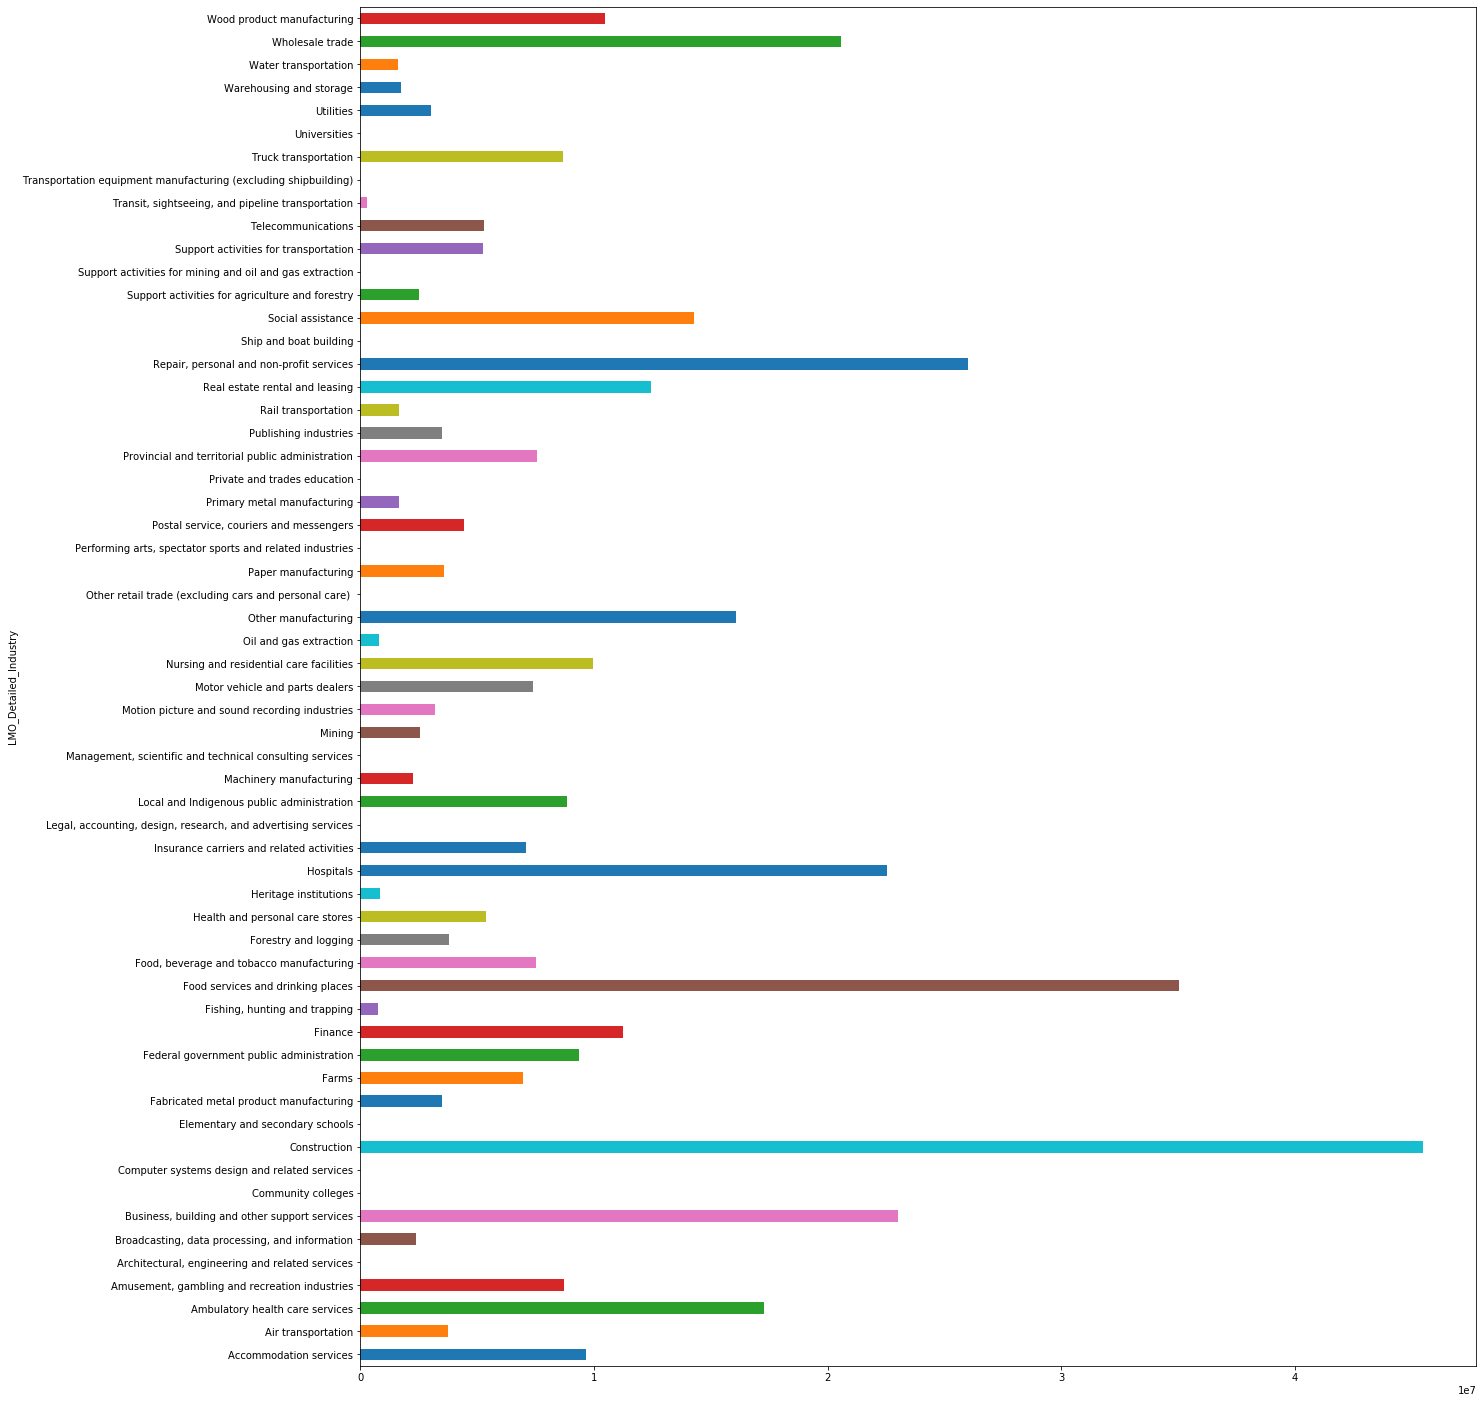

In [28]:
industry_wise_summary.plot(kind="barh", figsize=(20,25))

Text(0.5, 1.0, 'Employment wise Top 10 Industries Bar plot')

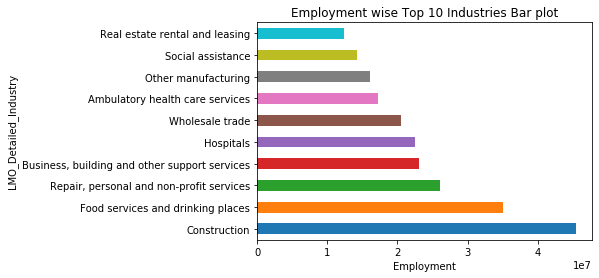

In [29]:
# Plotting employment wise top 10 Industries.

industry_wise_summary.sort_values(ascending=False)[:10].plot(kind='barh')
plt.xlabel("Employment")
plt.title("Employment wise Top 10 Industries Bar plot")

In [30]:
# Create a dataframe with Year and Month as index
month_wise_employment_summary = data_output.copy()
month_wise_employment_summary['month_idx'] = pd.to_datetime([f'{y}-{m}' for y, m in zip(month_wise_employment_summary.SYEAR, month_wise_employment_summary.SMTH)])
month_wise_employment_summary.index = month_wise_employment_summary["month_idx"]
month_wise_employment_summary.head()

,SYEAR,SMTH,LMO_Detailed_Industry,Employment,month_idx
month_idx,,,,,
1997-01-01,1997,1,Accommodation services,24000,1997-01-01
1997-01-01,1997,1,Air transportation,17000,1997-01-01
1997-01-01,1997,1,Ambulatory health care services,40000,1997-01-01
1997-01-01,1997,1,"Amusement, gambling and recreation industries",20000,1997-01-01
1997-01-01,1997,1,"Architectural, engineering and related services",0,1997-01-01


### Time series employment in Construction Industry, the top contributor of Employment

Let's plot time series data of the employment in Construction evolved overtime.

In [31]:
construction_data = month_wise_employment_summary[month_wise_employment_summary["LMO_Detailed_Industry"] == "Construction"]
construction_data.head()

,SYEAR,SMTH,LMO_Detailed_Industry,Employment,month_idx
month_idx,,,,,
1997-01-01,1997,1,Construction,118000,1997-01-01
1997-02-01,1997,2,Construction,120000,1997-02-01
1997-03-01,1997,3,Construction,116750,1997-03-01
1997-04-01,1997,4,Construction,125500,1997-04-01
1997-05-01,1997,5,Construction,123750,1997-05-01


Text(0, 0.5, 'Employment')

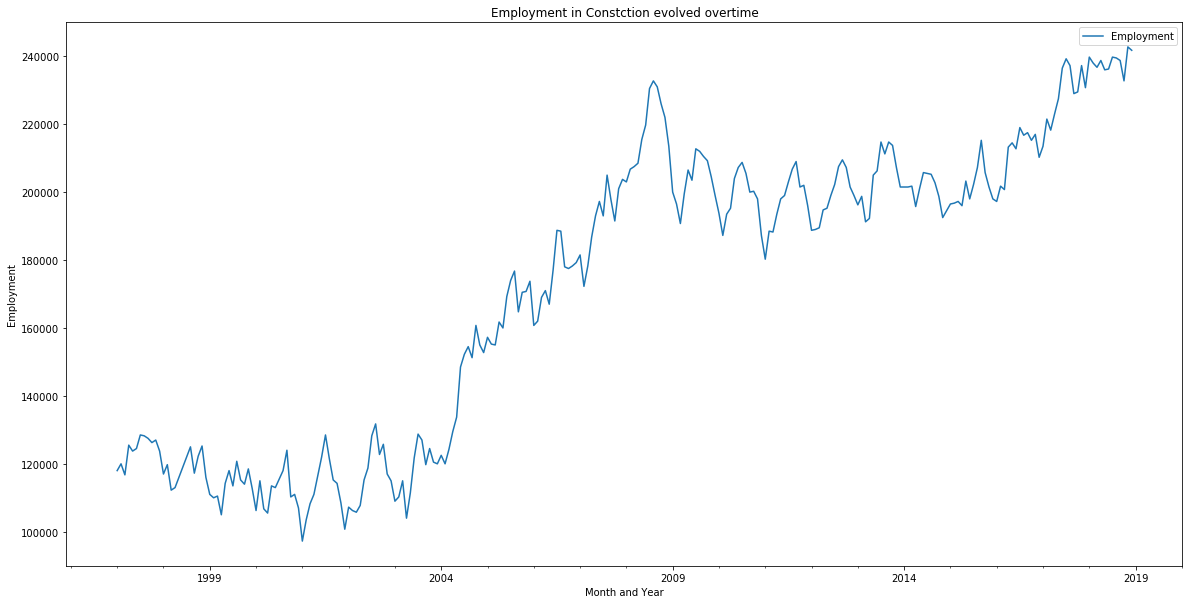

In [32]:
construction_data.plot(y="Employment", title="Employment in Constction evolved overtime", figsize=(20,10))
plt.xlabel("Month and Year")
plt.ylabel("Employment")

The employment in Construction is rapidly increased from 2004 till the global crisis mid 2008. As the global crisis started there is decline in employment but recently it could able to catch up and now it is the top most industry contributing towards total employment.

### Comparing employment in Construction with Total employment across all industries

C:\Users\govinds\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: FutureWarning: 'month_idx' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


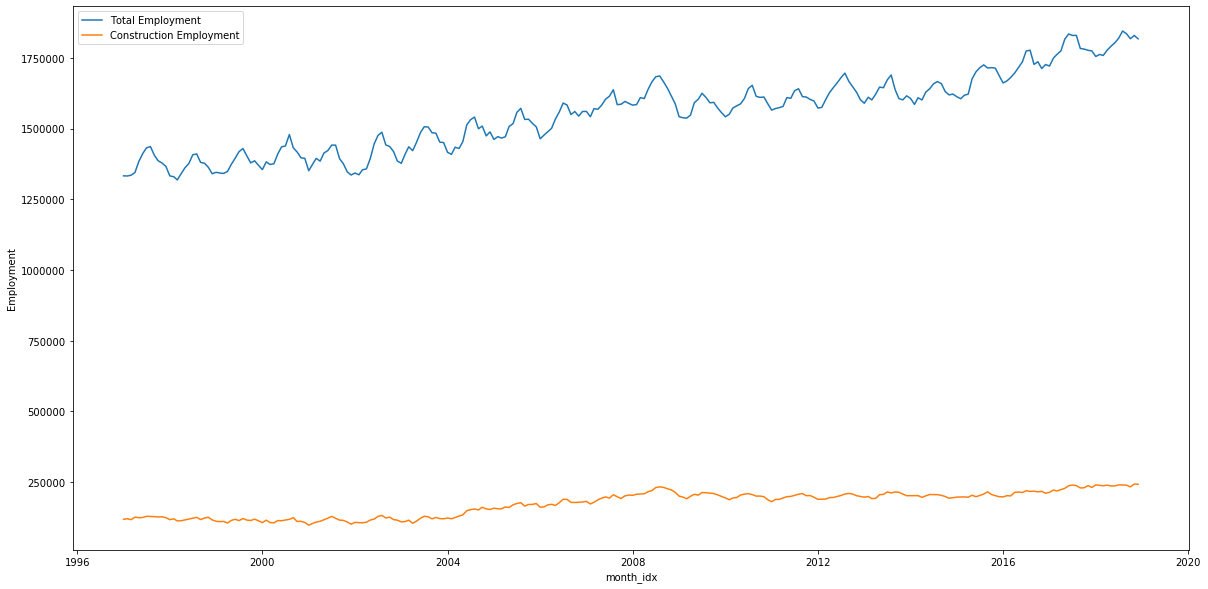

In [33]:
total_employment_summary = month_wise_employment_summary.groupby("month_idx")["Employment"].sum()
total_employment_summary = total_employment_summary.reset_index()
# total_employment_summary.head()
plt.figure(figsize=(20,10))
sns.lineplot(x="month_idx", y="Employment", data=total_employment_summary, label="Total Employment")
sns.lineplot(x="month_idx", y="Employment", data=construction_data, label="Construction Employment")
plt.title("")
plt.show()

In [34]:
# Calculating the percentage of Employment contributed by Construction Industry
construction_perc_df = pd.merge(left=total_employment_summary, right=construction_data, left_on="month_idx", right_on="month_idx", how="left")
construction_perc_df["Employment_perc"] = construction_perc_df["Employment_y"] / construction_perc_df["Employment_x"] * 100
construction_perc_df.head()

,month_idx,Employment_x,SYEAR,SMTH,LMO_Detailed_Industry,Employment_y,Employment_perc
0,1997-01-01,1332750,1997,1,Construction,118000,8.853874
1,1997-02-01,1332250,1997,2,Construction,120000,9.007318
2,1997-03-01,1335000,1997,3,Construction,116750,8.745318
3,1997-04-01,1344500,1997,4,Construction,125500,9.334325
4,1997-05-01,1383000,1997,5,Construction,123750,8.947939


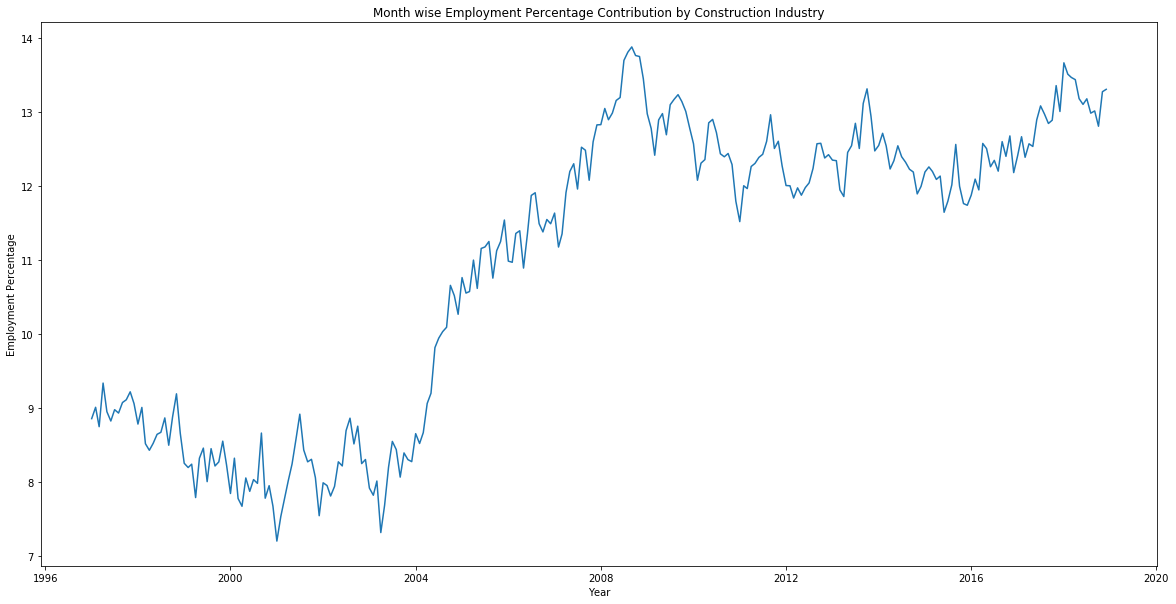

In [35]:
plt.figure(figsize=(20,10))
sns.lineplot(x="month_idx", y="Employment_perc", data=construction_perc_df)
plt.xlabel("Year")
plt.ylabel("Employment Percentage")
plt.title("Month wise Employment Percentage Contribution by Construction Industry")
plt.show()

More than 11% of employment is contributed by Construction Industry towards total employment every month from 2008 till now.

In [36]:
lmo_detailed_industries_data[lmo_detailed_industries_data["LMO_Detailed_Industry"] == "Construction"]

,LMO_Detailed_Industry,NAICS,NAICS_list
8,Construction,23,[23]


In [37]:
# Subsectors contibution towards the Construction Industry Sector
construction_subsector_data = dataframe_3_naics[dataframe_3_naics["lower_code"].str.match(r'23[0-9]') == True]
construction_subsector_summary = construction_subsector_data.groupby(["SYEAR", "NAICS"])["_EMPLOYMENT_"].sum()
construction_subsector_summary = construction_subsector_summary.reset_index()
construction_subsector_summary.head()

,SYEAR,NAICS,_EMPLOYMENT_
0,1997,Construction of buildings[236],303000
1,1997,Heavy and civil engineering construction[237],191250
2,1997,Specialty trade contractors[238],995500
3,1998,Construction of buildings[236],276750
4,1998,Heavy and civil engineering construction[237],186750


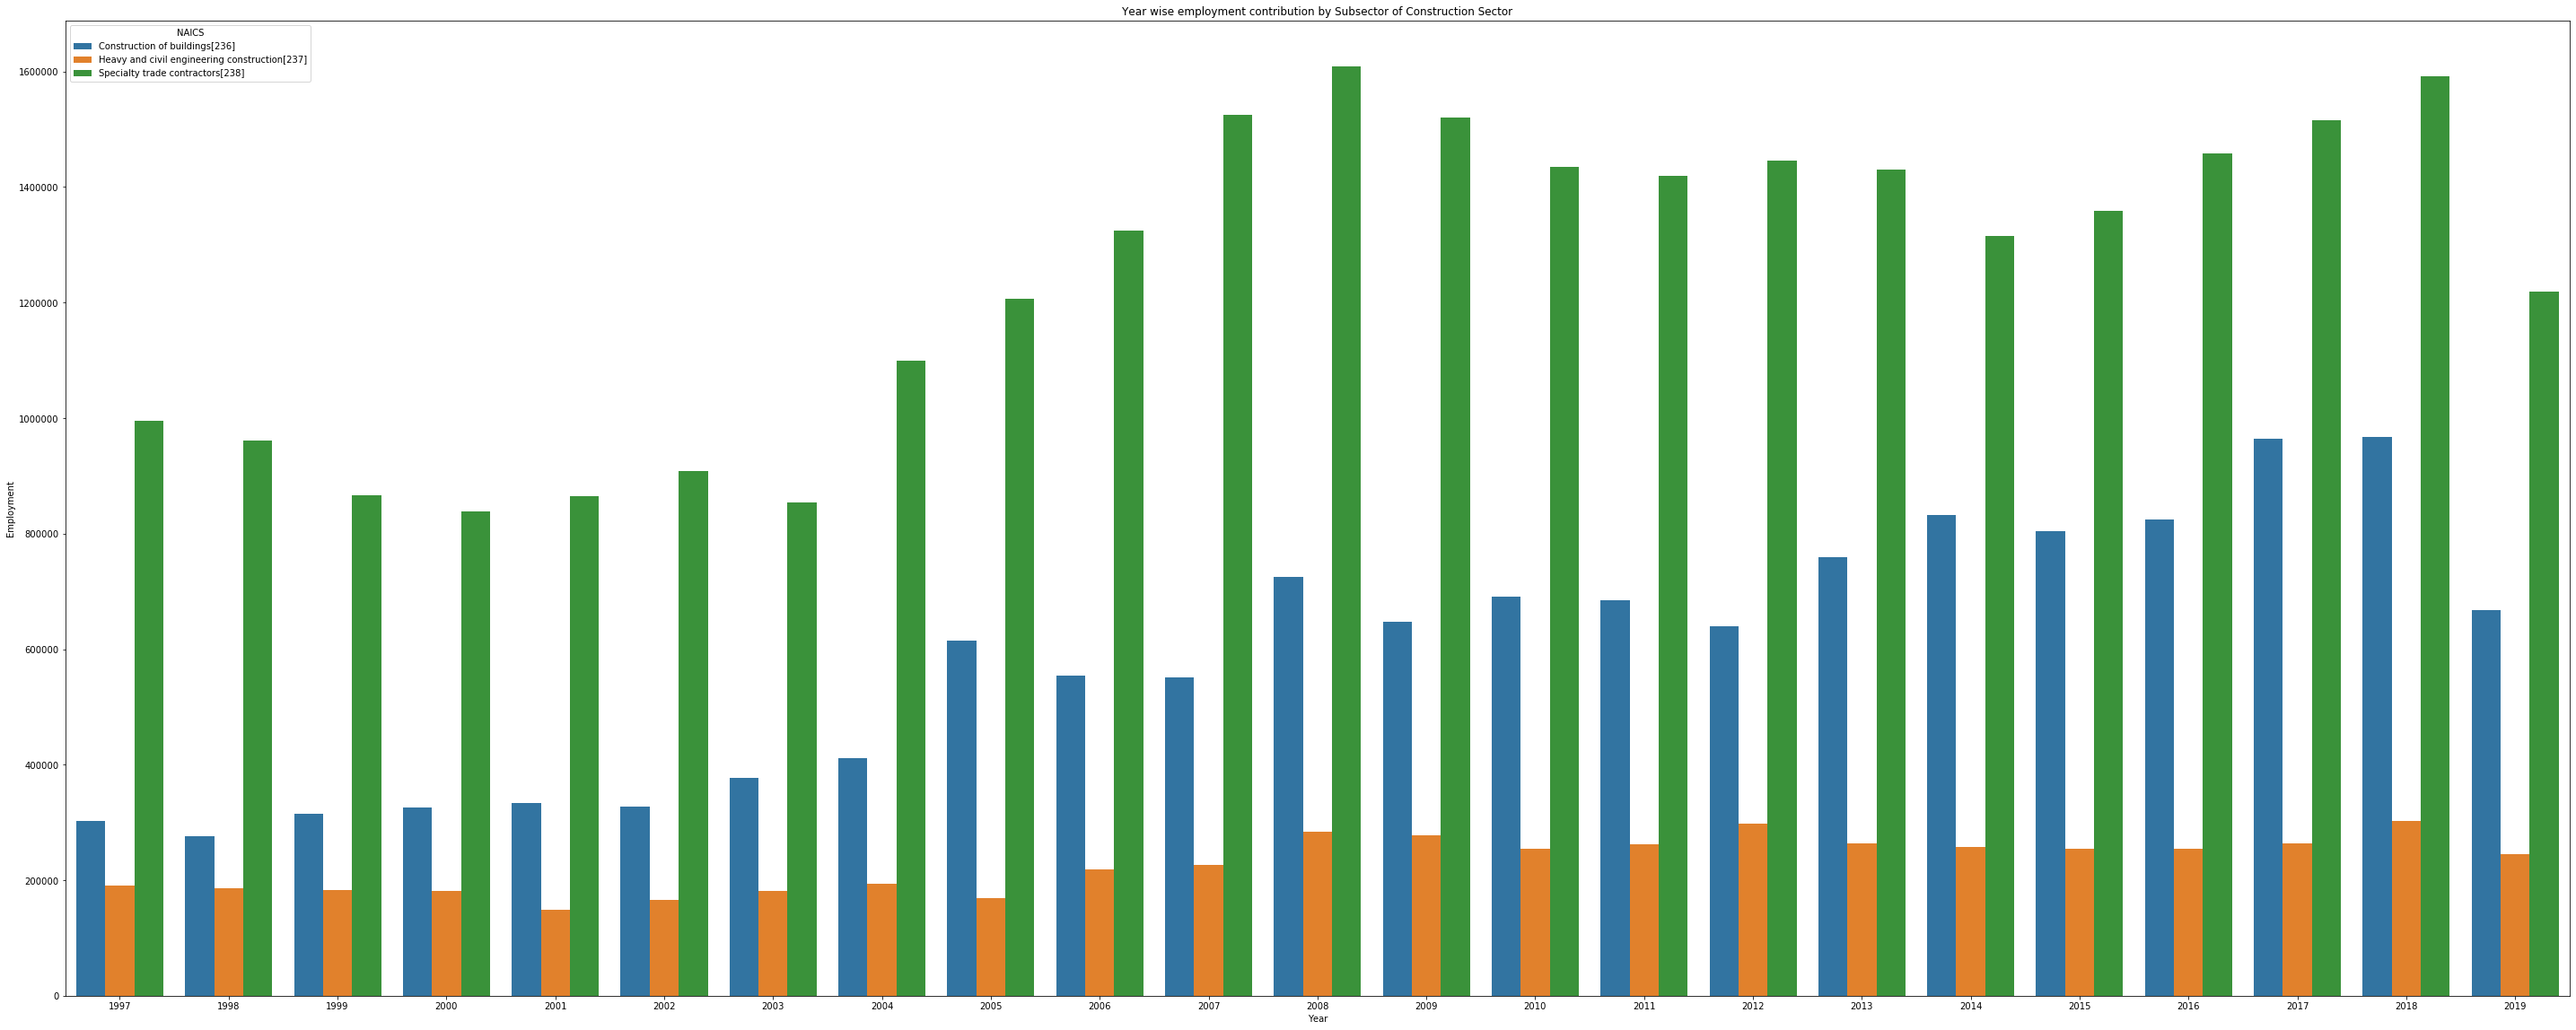

In [38]:
plt.figure(figsize=(50,20))
sns.barplot(x="SYEAR", y="_EMPLOYMENT_", hue="NAICS", data=construction_subsector_summary)
plt.xlabel("Year")
plt.ylabel("Employment")
plt.title("Year wise employment contribution by Subsector of Construction Sector")
plt.show()

In [39]:
# Subsectors contibution towards the Construction Industry Sector
construction_subsector = construction_subsector_data.groupby(["NAICS"])["_EMPLOYMENT_"].sum()
construction_subsector = construction_subsector.reset_index()
construction_subsector.head()

,NAICS,_EMPLOYMENT_
0,Construction of buildings[236],13591750
1,Heavy and civil engineering construction[237],5264750
2,Specialty trade contractors[238],28761250


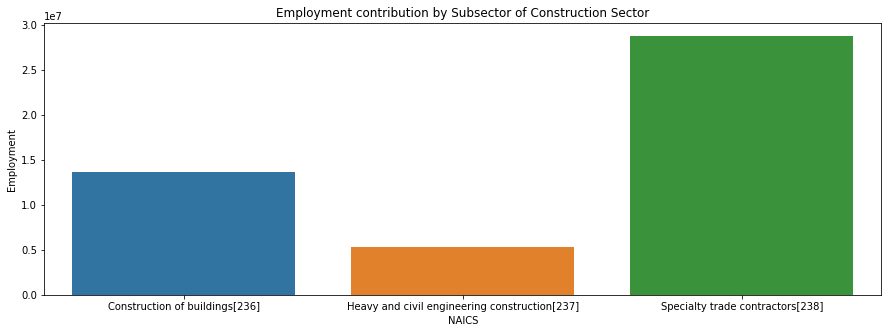

In [40]:
plt.figure(figsize=(15,5))
# construction_subsector.plot(kind="bar")
sns.barplot(x="NAICS", y="_EMPLOYMENT_", data=construction_subsector)
plt.ylabel("Employment")
plt.title("Employment contribution by Subsector of Construction Sector")
plt.show()

Specialty trade contractors\[238\] subsector is the largest contributor towards the employment of Construction sector.

In [41]:
# top 10 Employment contributing sectors
industry_wise_summary.sort_values(ascending=False)[:10]

LMO_Detailed_Industry
Construction                                     45485000
Food services and drinking places                35033250
Repair, personal and non-profit services         26021250
Business, building and other support services    23018500
Hospitals                                        22518250
Wholesale trade                                  20564750
Ambulatory health care services                  17292750
Other manufacturing                              16090250
Social assistance                                14290250
Real estate rental and leasing                   12423750
Name: Employment, dtype: int32

### Time Series Employment in Food services and drinking places Sector

Text(0, 0.5, 'Employment')

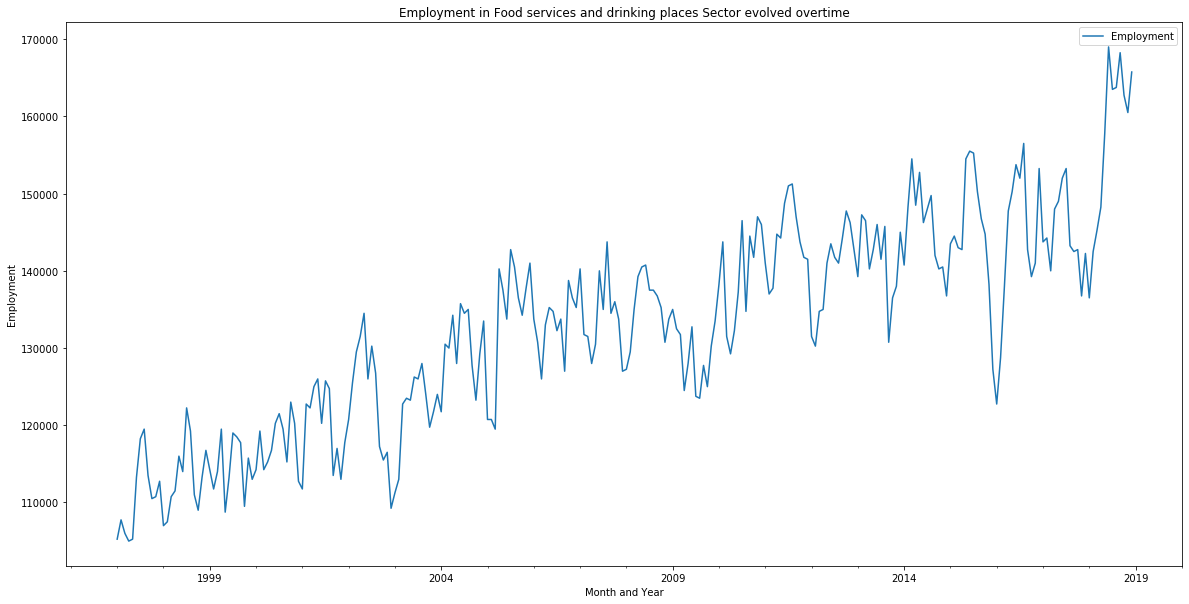

In [42]:
food_sector_data = month_wise_employment_summary[month_wise_employment_summary["LMO_Detailed_Industry"] == "Food services and drinking places"]

food_sector_data.plot(y="Employment", title="Employment in Food services and drinking places Sector evolved overtime", figsize=(20,10))
plt.xlabel("Month and Year")
plt.ylabel("Employment")

Food services and drinking places Sector Employment is continuously growing and is the second largest contributor towards the total employment.

### Contribution of Employment by Food services and drinking places Sector

In [43]:
# Calculating the percentage of Employment contributed by Food services and drinking places Sector
food_sector_perc_df = pd.merge(left=total_employment_summary, right=food_sector_data, left_on="month_idx", right_on="month_idx", how="left")
food_sector_perc_df["Employment_perc"] = food_sector_perc_df["Employment_y"] / food_sector_perc_df["Employment_x"] * 100
food_sector_perc_df.head()

,month_idx,Employment_x,SYEAR,SMTH,LMO_Detailed_Industry,Employment_y,Employment_perc
0,1997-01-01,1332750,1997,1,Food services and drinking places,105250,7.897205
1,1997-02-01,1332250,1997,2,Food services and drinking places,107750,8.087821
2,1997-03-01,1335000,1997,3,Food services and drinking places,106000,7.940075
3,1997-04-01,1344500,1997,4,Food services and drinking places,105000,7.809595
4,1997-05-01,1383000,1997,5,Food services and drinking places,105250,7.610268


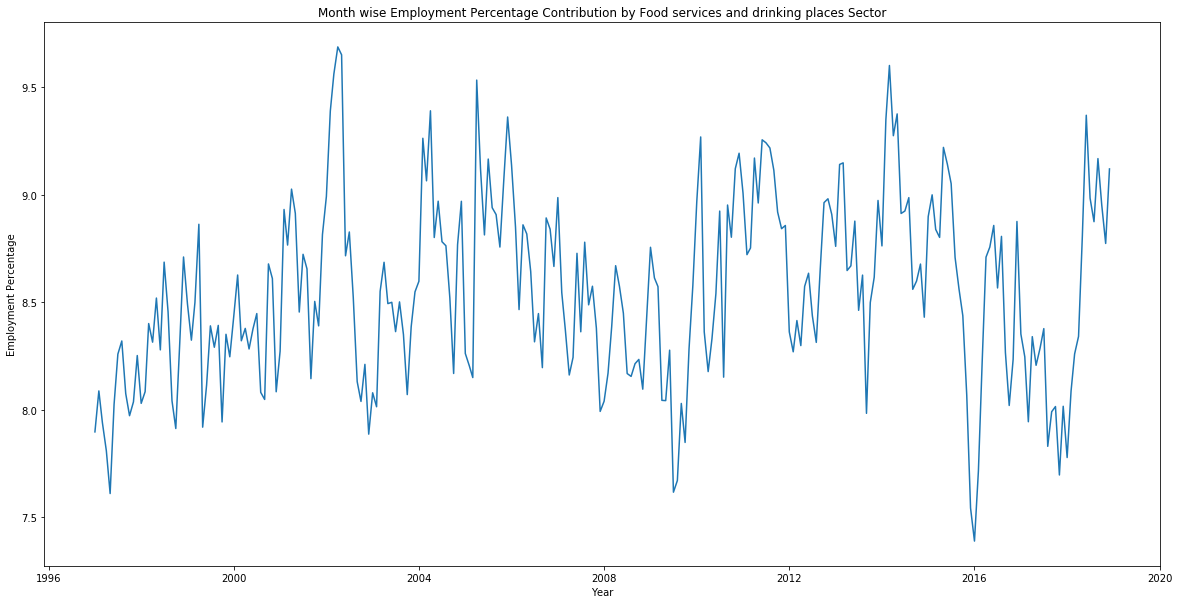

In [44]:
plt.figure(figsize=(20,10))
sns.lineplot(x="month_idx", y="Employment_perc", data=food_sector_perc_df)
plt.xlabel("Year")
plt.ylabel("Employment Percentage")
plt.title("Month wise Employment Percentage Contribution by Food services and drinking places Sector")
plt.show()

The contribution of Food services and drinking places Sector towards total employment is very fluctuating between 7.5 to 9%.

### Subsector Contribution towards Employment of Food services and drinking places

In [45]:
lmo_detailed_industries_data[lmo_detailed_industries_data["LMO_Detailed_Industry"] == "Food services and drinking places"]

,LMO_Detailed_Industry,NAICS,NAICS_list
54,Food services and drinking places,722,[722]


In [46]:
# Subsectors contibution towards the Food services and drinking places Sector
# dataframe_4_naics["NAICS"].astype(str).head()
food_subsector_data = dataframe_4_naics[dataframe_4_naics["NAICS"].astype(str).str.match(r'722[0-9]') == True]
food_subsector_summary = food_subsector_data.groupby(["NAICS"])["_EMPLOYMENT_"].sum()
food_subsector_summary = food_subsector_summary.reset_index()
food_subsector_summary.head()

,NAICS,_EMPLOYMENT_
0,7223,1707000
1,7224,1894750
2,7225,32827500


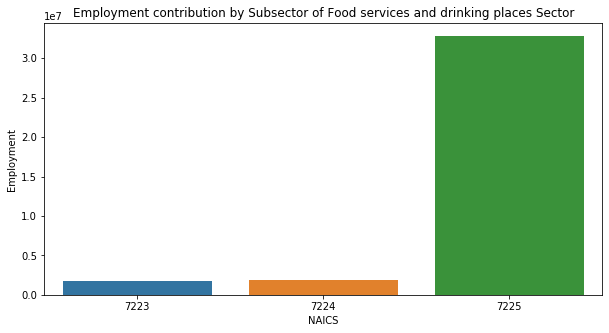

In [47]:
plt.figure(figsize=(10,5))
sns.barplot(x="NAICS", y="_EMPLOYMENT_", data=food_subsector_summary)
plt.ylabel("Employment")
plt.title("Employment contribution by Subsector of Food services and drinking places Sector")
plt.show()

The subsector 7225 is the largest contributor of employment for the Food services and drinking places sector.

### Time series Employment Analysis of Repair, personal and non-profit services Sector, the 3rd largest employment contributor

Text(0, 0.5, 'Employment')

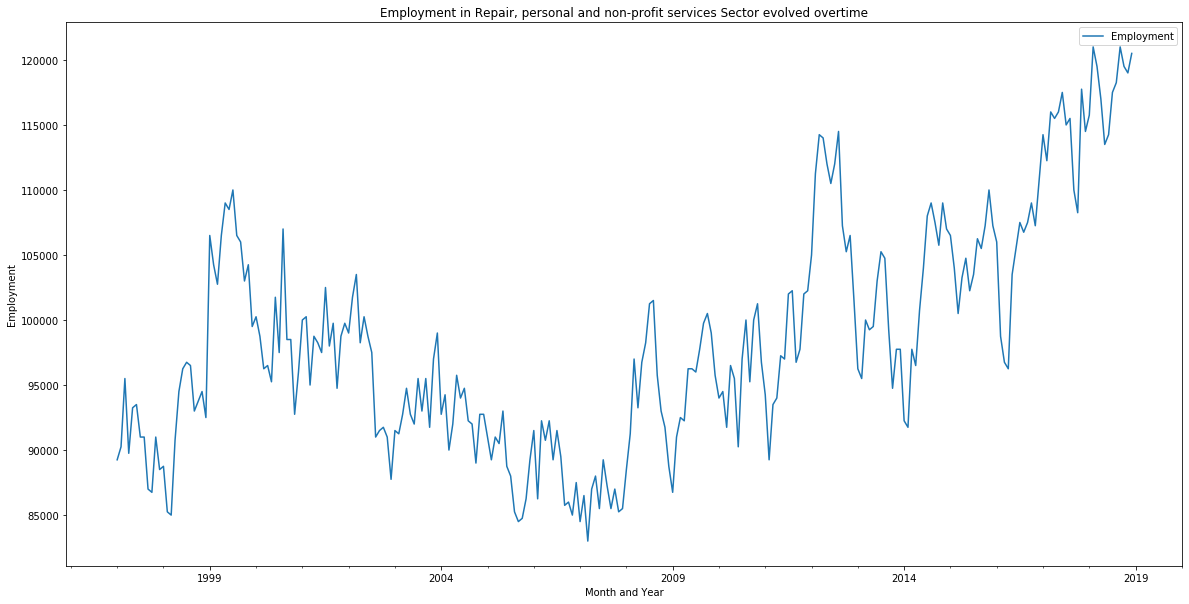

In [48]:
repair_sector_data = month_wise_employment_summary[month_wise_employment_summary["LMO_Detailed_Industry"] == "Repair, personal and non-profit services"]
# repair_sector_data.head()
repair_sector_data.plot(y="Employment", title="Employment in Repair, personal and non-profit services Sector evolved overtime", figsize=(20,10))
plt.xlabel("Month and Year")
plt.ylabel("Employment")

After the Financial Global Crisis this sector mean employment rate per year is continuously increasing.

### Contribution of Repair, personal and non-profit services Sector towards total employment

In [49]:
# Calculating the percentage of Employment contributed by Food services and drinking places Sector
repair_sector_perc_df = pd.merge(left=total_employment_summary, right=repair_sector_data, left_on="month_idx", right_on="month_idx", how="left")
repair_sector_perc_df["Employment_perc"] = repair_sector_perc_df["Employment_y"] / repair_sector_perc_df["Employment_x"] * 100
repair_sector_perc_df.head()

,month_idx,Employment_x,SYEAR,SMTH,LMO_Detailed_Industry,Employment_y,Employment_perc
0,1997-01-01,1332750,1997,1,"Repair, personal and non-profit services",89250,6.696680
1,1997-02-01,1332250,1997,2,"Repair, personal and non-profit services",90250,6.774254
2,1997-03-01,1335000,1997,3,"Repair, personal and non-profit services",95500,7.153558
3,1997-04-01,1344500,1997,4,"Repair, personal and non-profit services",89750,6.675344
4,1997-05-01,1383000,1997,5,"Repair, personal and non-profit services",93250,6.742589


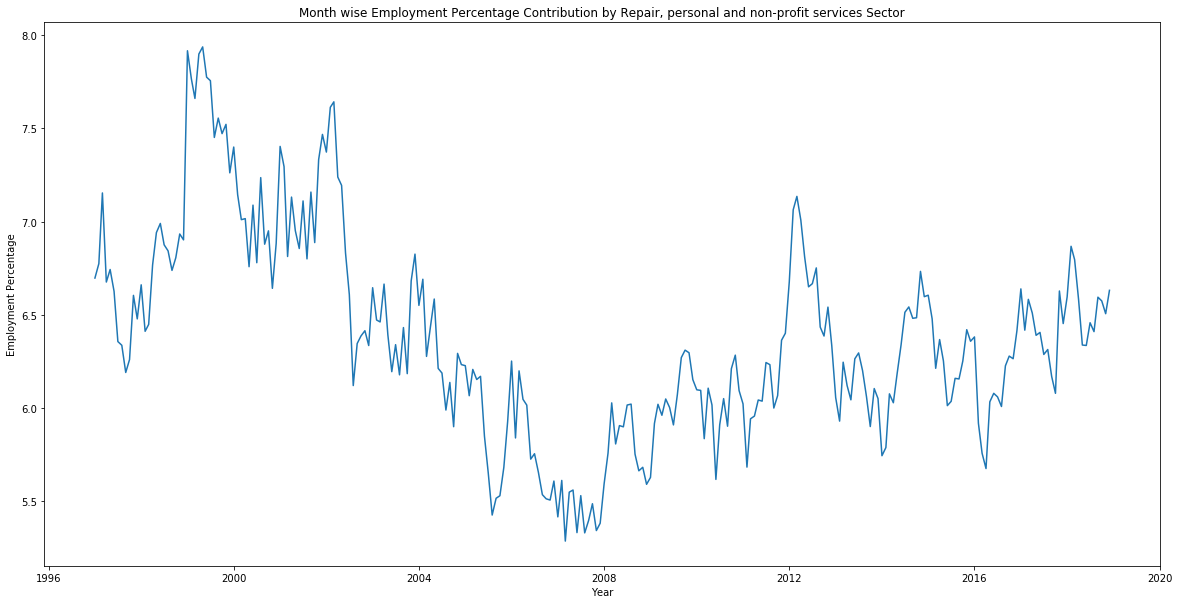

In [50]:
plt.figure(figsize=(20,10))
sns.lineplot(x="month_idx", y="Employment_perc", data=repair_sector_perc_df)
plt.xlabel("Year")
plt.ylabel("Employment Percentage")
plt.title("Month wise Employment Percentage Contribution by Repair, personal and non-profit services Sector")
plt.show()

This Repair, personal and non-profit services sector was greately effected by the Global Financial Crisis. Now this sector is slowly increasing its contribution towards employment.

### Subsector Contribution towards Employment of Repair, personal and non-profit services

In [51]:
lmo_detailed_industries_data[lmo_detailed_industries_data["LMO_Detailed_Industry"] == "Repair, personal and non-profit services"]

,LMO_Detailed_Industry,NAICS,NAICS_list
55,"Repair, personal and non-profit services",81,[81]


In [52]:
# Subsectors contibution towards the employment of Repair, personal and non-profit services
repair_subsector_data = dataframe_3_naics[dataframe_3_naics["lower_code"].str.match(r'81[0-9]') == True]
repair_subsector_summary = repair_subsector_data.groupby(["NAICS"])["_EMPLOYMENT_"].sum()
repair_subsector_summary = repair_subsector_summary.reset_index()
repair_subsector_summary.head()

,NAICS,_EMPLOYMENT_
0,Personal and laundry services[812],8784500
1,Private households[814],3317500
2,"Religious, grant-making, civic, and profession...",5728500
3,Repair and maintenance[811],9272500


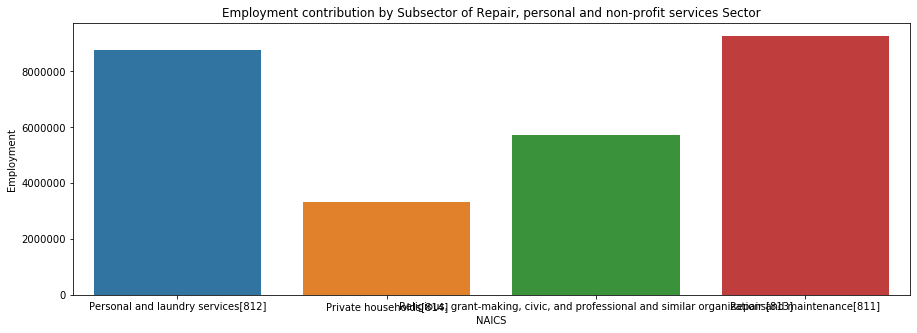

In [53]:
plt.figure(figsize=(15,5))
sns.barplot(x="NAICS", y="_EMPLOYMENT_", data=repair_subsector_summary)
plt.ylabel("Employment")
plt.title("Employment contribution by Subsector of Repair, personal and non-profit services Sector")
plt.show()

## Conclusion

The top three largest employment contributor sectors are contributing almost 20 to 25% of Total employment. The Construction secotr is the greatest contributor with more than 11% contribution. 